In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data_path = '../Data Wrangling/dataset_part_2.csv'
df = pd.read_csv(data_path)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


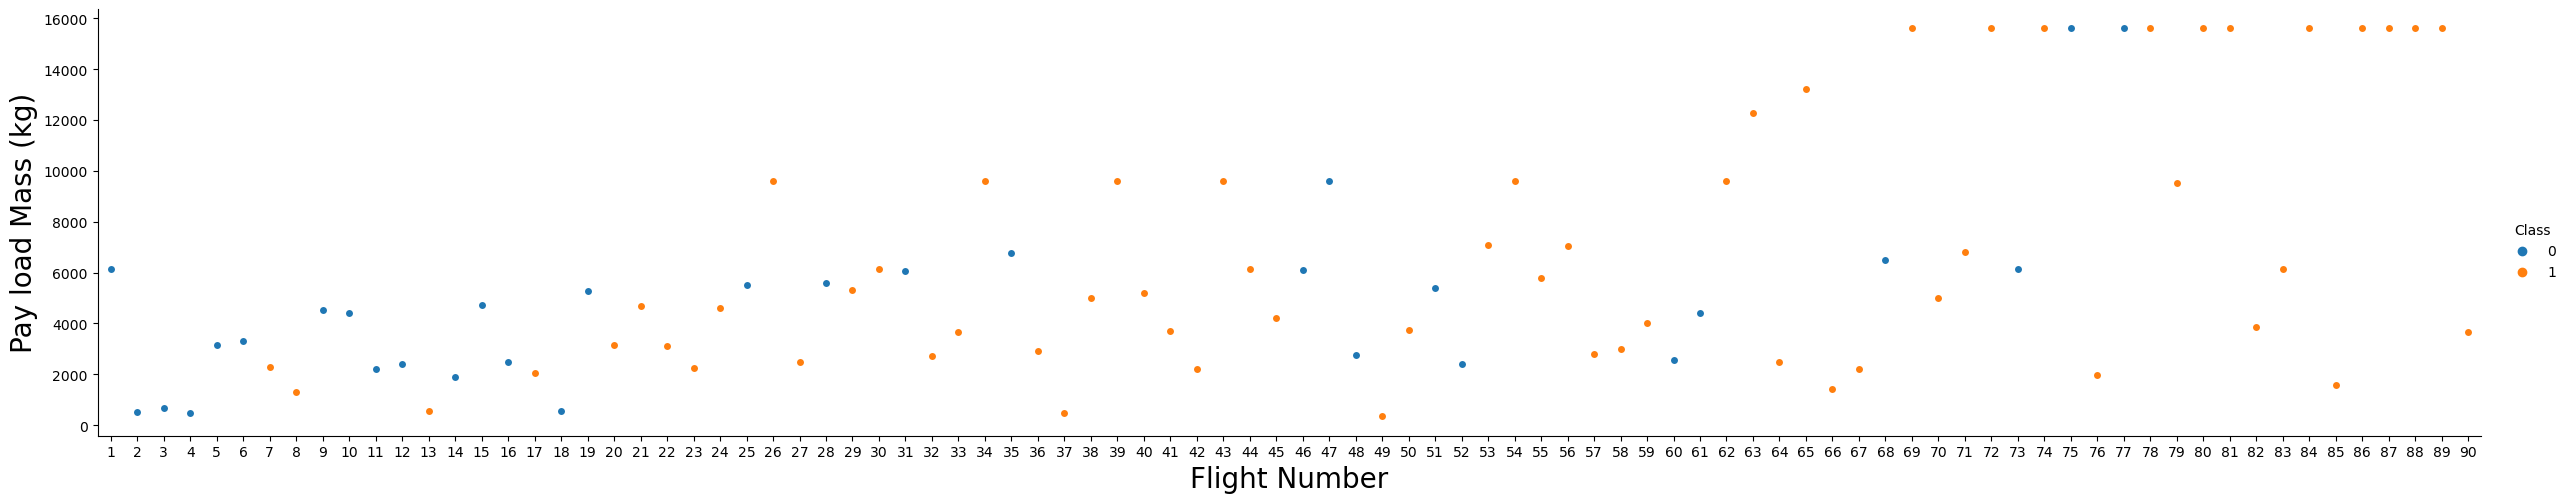

In [8]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.show()

### Task 1: Visualize the relationship between FlightNumber and LaunchSite

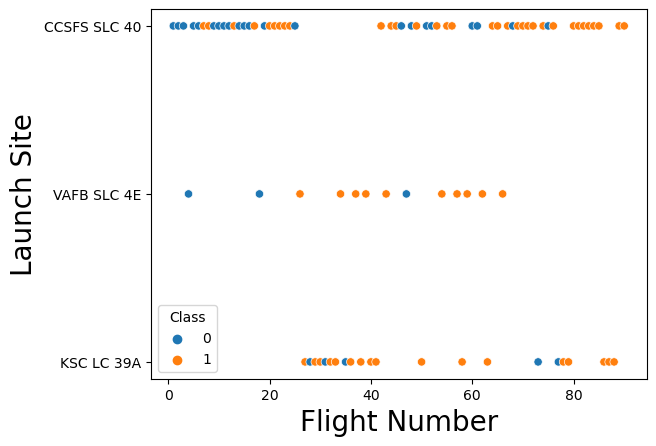

In [12]:
sns.scatterplot(y="LaunchSite", x="FlightNumber", data=df, hue="Class")
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

### Task 2: Visualize the relationship between Payload and LaunchSite


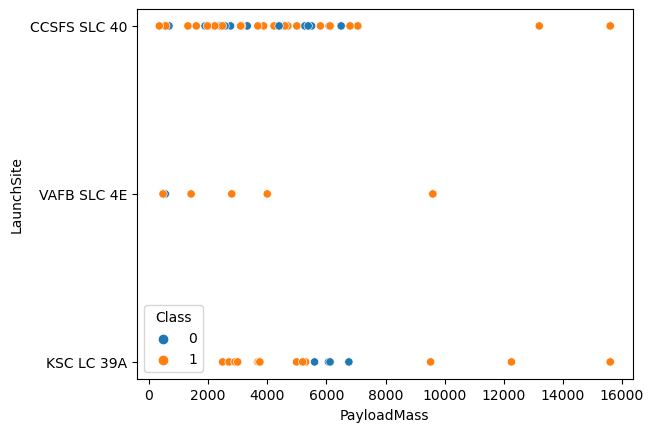

In [14]:
sns.scatterplot(x="PayloadMass", y="LaunchSite", data=df, hue="Class")
plt.xlabel("PayloadMass")
plt.ylabel("LaunchSite")
plt.show()

For the VAFB SLC 4E launch site, there are no rockets launched for heavy payload mass (>10000)

### Task 3: Visualize the relationship between success rate of each orbit type

In [25]:
df_new = df.groupby(['Orbit'])['Class'].sum()
df_new = pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new.columns = ['Orbit', 'Count']
total_launch = df_new['Count'].sum()
df_new['Count'] = np.round(df_new['Count'] / total_launch * 100, 2)
df_new

,Orbit,Count
0,ES-L1,1.67
1,GEO,1.67
2,GTO,23.33
3,HEO,1.67
4,ISS,21.67
5,LEO,8.33
6,MEO,3.33
7,PO,10.00
8,SO,0.00
9,SSO,8.33


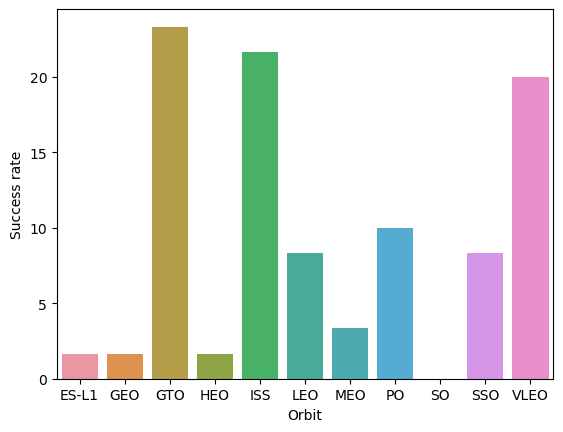

In [26]:
sns.barplot(x='Orbit', y='Count', data=df_new)
plt.xlabel('Orbit')
plt.ylabel('Success rate')
plt.show()

### Task 4: Visualize the relationship between FlightNumber and Orbit type

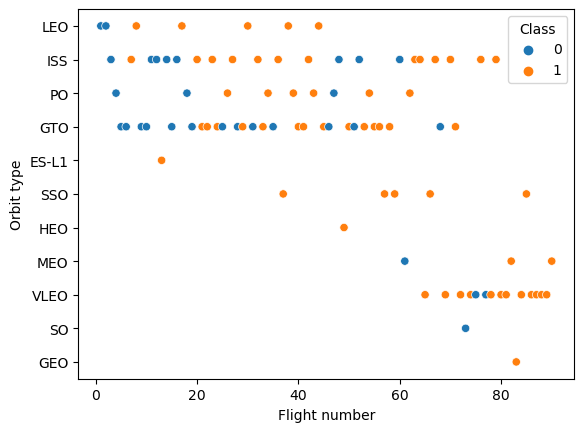

In [28]:
sns.scatterplot(x='FlightNumber', y='Orbit', data=df, hue='Class')
plt.xlabel('Flight number')
plt.ylabel('Orbit type')
plt.show()

### Task 5: Visualize the relationship between Payload and Orbit type

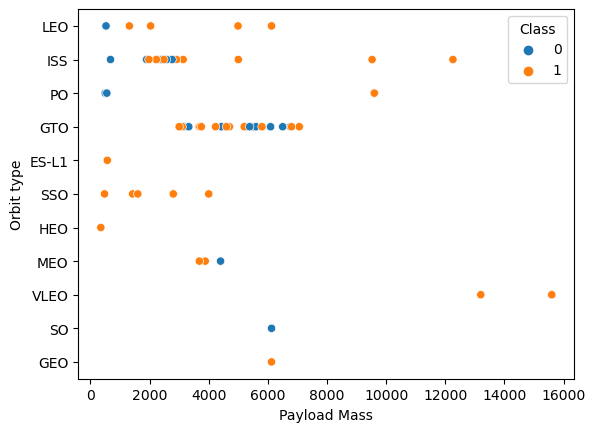

In [29]:
sns.scatterplot(x='PayloadMass', y='Orbit', data=df, hue='Class')
plt.xlabel('Payload Mass')
plt.ylabel('Orbit type')
plt.show()

### Task 6: visualize the launch success yearly trend

In [60]:
# A function to Extract years from the date
year = []


def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


Extract_year()
df["Date"] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [63]:
df_new = df.groupby(["Date"])['Class'].value_counts()
df_new = pd.DataFrame(df_new)
df_new.columns = ['#Success']
df_new.reset_index(inplace=True)
df_new.columns = ['Date', '#Failure', '#Success']
df_new


,Date,#Failure,#Success
0,2010,0,1
1,2012,0,1
2,2013,0,3
3,2014,0,4
4,2014,1,2
5,2015,0,4
6,2015,1,2
7,2016,1,5
8,2016,0,3
9,2017,1,15


In [64]:
df_new["SuccessfulRate"] = np.round(df_new["#Success"] / (df_new['#Success'] + df_new['#Failure']) * 100, 2)
df_new

,Date,#Failure,#Success,SuccessfulRate
0,2010,0,1,100.00
1,2012,0,1,100.00
2,2013,0,3,100.00
3,2014,0,4,100.00
4,2014,1,2,66.67
5,2015,0,4,100.00
6,2015,1,2,66.67
7,2016,1,5,83.33
8,2016,0,3,100.00
9,2017,1,15,93.75


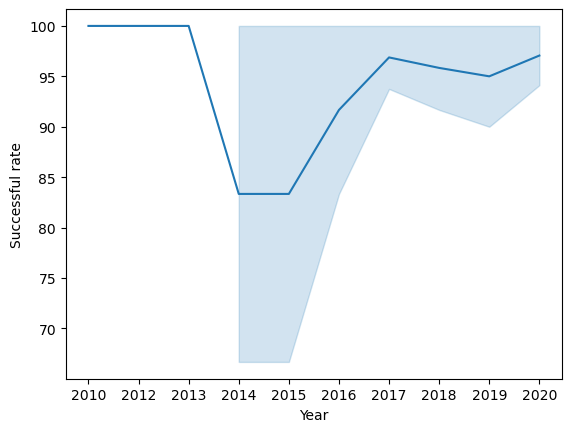

In [66]:
sns.lineplot(x='Date', y='SuccessfulRate', data=df_new)
plt.xlabel('Year')
plt.ylabel('Successful rate')
plt.show()

## Feature Engineering

In [67]:
features = df[
    [
        "FlightNumber",
        "PayloadMass",
        "Orbit",
        "LaunchSite",
        "Flights",
        "GridFins",
        "Reused",
        "Legs",
        "LandingPad",
        "Block",
        "ReusedCount",
        "Serial",
    ]
]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Task 7: create dummy variables to categorical columns

In [75]:
features_one_hot = pd.get_dummies(data=features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
### Task 8: cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         

In [77]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)